### Business Understanding
A <b> Surprise Housing company </b> is looking for guidance in identifying factors which are significant in predicting the price of a house.

<b>Business objective:</b> 
    <br>Which are variables significant in predicting the price of a house.
    <br>How well those variables describe the price of a house.

<b>Data sourceses:</b><br>
1. data_description.txt - Provides the description of the column in the given data
2. train.csv -House sold from 2006:2010

<b>Steps for solutioning this problem:</b>
1.	Reading, understanding and visualization of data.
2.	Preparing data for modelling (train / test split, scaling etc…)
3.	Training the Model – regression model using regularisation.
4.	Reduce  Analysis.
5.	Prediction and evaluation of Test set data.

In [74]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import calendar

#Updating maximum rows and cols displayed in when display
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

## Step 1 a: Reading and Understanding the Dataset

In [75]:
housing = pd.read_csv("C:/Srikanth/Python/train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [76]:
#File size
('Rows','Cols'),housing.shape

(('Rows', 'Cols'), (1460, 81))

In [77]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Observation: Missing data exist, need to review and handle it.

#### Data Cleaning and Mapping, Data Preperation

In [78]:
# percentage of missing values in each column
round(100*(housing.isnull().sum()/len(housing)), 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
                 ...  
CentralAir        0.00
SaleCondition     0.00
Heating           0.00
TotalBsmtSF       0.00
Id                0.00
Length: 81, dtype: float64

In [79]:
#drop the duplicate records
housing = housing.drop_duplicates()
housing = housing.dropna(how='all')

In [80]:
#File size
('Rows','Cols'),housing.shape

(('Rows', 'Cols'), (1460, 81))

Observation: No null/ NA values at row / record level in the data set.

In [81]:
#Let's observe nulless in data set
#creating pandas dataset of the nullness
nullness_df = pd.DataFrame(housing.isnull().sum()/housing.shape[0] * 100).reset_index()
nullness_df.columns = ['Column','Null in Percent']

In [82]:
#Finding column with more than 80% null values
Null80_df = nullness_df[nullness_df['Null in Percent']>80]

In [83]:
Null80_df

,Column,Null in Percent
6,Alley,93.767123
72,PoolQC,99.520548
73,Fence,80.753425
74,MiscFeature,96.301370


Alley can be dropped as it has relation with Street.<br>
PoolQC seems promizing for target value, so let's not drop it.<br>
Fence as well seems promizing for target value, so let's not drop it.<br>
MiscFeature	can be dropped which is 96% null values.<br>

In [84]:
housing = housing.drop(['Alley','MiscFeature'], axis =1)

In [85]:
#File size
('Rows','Cols'),housing.shape

(('Rows', 'Cols'), (1460, 79))

In [86]:
# Recalculating percentage of missing values in each column
round(100*(housing.isnull().sum()/len(housing)), 2).sort_values(ascending=False)

PoolQC           99.52
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
                 ...  
CentralAir        0.00
SaleCondition     0.00
Heating           0.00
TotalBsmtSF       0.00
Id                0.00
Length: 79, dtype: float64

In [87]:
zeroness_df = (housing[~housing.astype('bool')].count()/housing.shape[0] * 100).reset_index()
zeroness_df.columns = ['Column','Zero in Percent']

In [88]:
zero80_df = zeroness_df[zeroness_df['Zero in Percent'] > 80]

In [89]:
# Below are the columns with more than 80% zero values
zero80_df

,Column,Zero in Percent
35,BsmtFinSF2,88.561644
44,LowQualFinSF,98.219178
47,BsmtHalfBath,94.383562
67,EnclosedPorch,85.753425
68,3SsnPorch,98.356164
69,ScreenPorch,92.054795
70,PoolArea,99.520548
73,MiscVal,96.438356


Let's plot scatter to check linear relationship between above features with Target variable.

<AxesSubplot:xlabel='SalePrice', ylabel='BsmtFinSF2'>

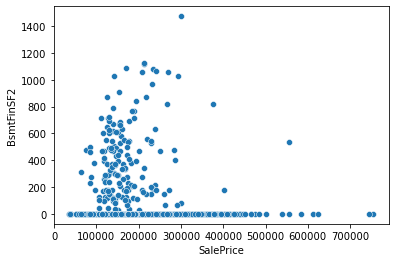

In [90]:
sns.scatterplot( data = housing , x = 'SalePrice' , y = 'BsmtFinSF2')

<AxesSubplot:xlabel='SalePrice', ylabel='LowQualFinSF'>

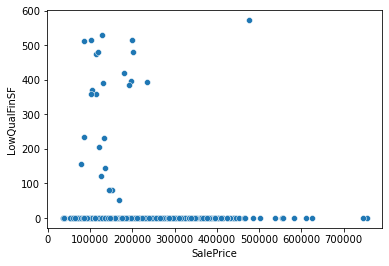

In [91]:
sns.scatterplot( data = housing , x = 'SalePrice' , y = 'LowQualFinSF')

No much linear relationsip to target, so drop LowQualFinSF.

<AxesSubplot:xlabel='SalePrice', ylabel='BsmtHalfBath'>

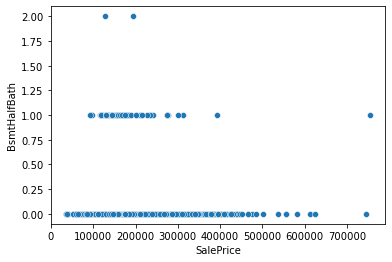

In [92]:
sns.scatterplot( data = housing , x = 'SalePrice' , y = 'BsmtHalfBath')

No much linear relationsip to target, so drop BsmtHalfBath.

<AxesSubplot:xlabel='SalePrice', ylabel='EnclosedPorch'>

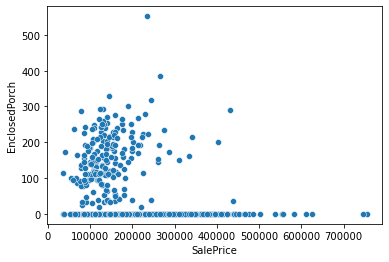

In [93]:
sns.scatterplot( data = housing , x = 'SalePrice' , y = 'EnclosedPorch')

<AxesSubplot:xlabel='SalePrice', ylabel='3SsnPorch'>

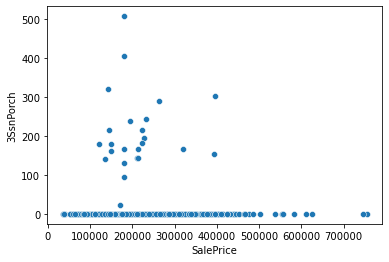

In [94]:
sns.scatterplot( data = housing , x = 'SalePrice' , y = '3SsnPorch')

<AxesSubplot:xlabel='SalePrice', ylabel='ScreenPorch'>

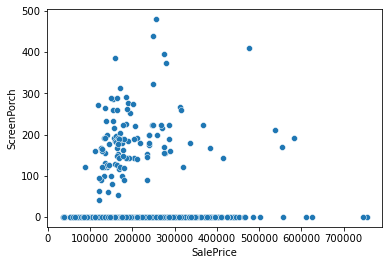

In [95]:
sns.scatterplot( data = housing , x = 'SalePrice' , y = 'ScreenPorch')

<AxesSubplot:xlabel='SalePrice', ylabel='PoolArea'>

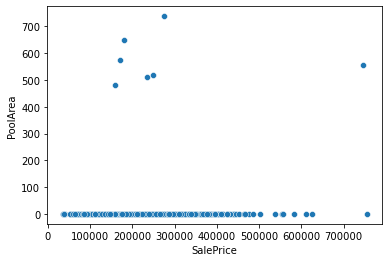

In [96]:
sns.scatterplot( data = housing , x = 'SalePrice' , y = 'PoolArea')

<AxesSubplot:xlabel='SalePrice', ylabel='MiscVal'>

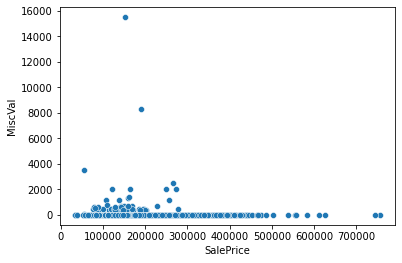

In [97]:
sns.scatterplot( data = housing , x = 'SalePrice' , y = 'MiscVal')

In [98]:
housing = housing.drop(['BsmtHalfBath','LowQualFinSF'], axis =1)

In [99]:
#File size
('Rows','Cols'),housing.shape

(('Rows', 'Cols'), (1460, 77))

In [142]:
correlation = housing.corr()['SalePrice'].sort_values(ascending = False).to_frame().head(10)

cmap = sns.light_palette("Green", as_cmap = True)

s = correlation.style.background_gradient(cmap = cmap)

s

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
ExterQual,0.682639
KitchenQual,0.659600
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664


In [100]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'Enclosed

In [101]:
housing.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
319,320,80,RL,NaN,14115,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,6,2009,WD,Normal,187500
1405,1406,120,RM,44.0,3842,Pave,IR1,HLS,AllPub,Inside,...,155,0,NaN,NaN,0,1,2008,WD,Normal,275000
644,645,20,FV,85.0,9187,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,10,2009,New,Partial,370878
579,580,50,RM,81.0,12150,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,11,2008,WD,Normal,131500
414,415,60,RL,59.0,11228,Pave,IR2,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,0,12,2008,WD,Normal,228000
494,495,30,RM,50.0,5784,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,12,2009,WD,Normal,91300
618,619,20,RL,90.0,11694,Pave,Reg,Lvl,AllPub,Inside,...,260,0,NaN,NaN,0,7,2007,New,Partial,314813
1155,1156,20,RL,90.0,10768,Pave,IR1,Lvl,AllPub,Corner,...,180,0,NaN,NaN,0,7,2007,WD,Normal,218000
1263,1264,70,RL,60.0,13515,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,0,7,2007,WD,Normal,180500
530,531,80,RL,85.0,10200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,8,2008,WD,Abnorml,175000


In [102]:
# Based on my understanding to various categorial variables, below mapper(s) maps integer to possible data points / categories.
# NA has a different meaning, so we consider it as possible data points.
def My_Functionalmapper(x):
    return x.map({'Typ': 7, "Min1": 6, "Min2": 5, "Mod": 4, "Maj1": 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})

def My_Fencemapper(x):
    return x.map({'GdPrv': 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1 ,"NA":0})

def My_Ratingmapper_cat1(x):
    return x.map({'Ex': 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "NA": 0})

def  My_Ratingmapper_cat2(x):
    return x.map({'Gd': 4, "Av": 3, "Mn": 2, "No": 1, "NA": 0})

def  My_Ratingmapper_cat3(x):
    return x.map({'GLQ': 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, 'Unf': 1, "NA": 0})

def My_Garagemapper(x):
    return x.map({'Fin': 3, "RFn": 2, "Unf": 1, "NA": 0})

def My_Lotshapemapper(x):
    return x.map({'Reg': 3, "IR1": 2, "IR2": 1, "IR3": 0})

def My_Landslopemapper(x):
    return x.map({'Gtl': 2, "Mod": 1, "Sev": 0})

def My_Electricalmapper(x):
    return x.map({'FuseA': 5, "FuseF": 4, "FuseP": 3, "Mix": 2,"SBrkr": 1, 'NA': 0})

def My_MasVnrTypemapper(x):
    return x.map({'BrkCmn': 5, "BrkFace": 4, "CBlock": 3, "Stone": 2,"None": 1,'NA': 0})

In [103]:
# Assigned varibles to above mappers.
housing[['Functional']] = housing[['Functional']].apply(My_Functionalmapper)
housing[['Fence']] = housing[['Fence']].apply(My_Fencemapper)
housing[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']] = housing[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']].apply(My_Ratingmapper_cat1)
housing[['BsmtExposure']] = housing[['BsmtExposure']].apply(My_Ratingmapper_cat2)
housing[['BsmtFinType1', 'BsmtFinType2']] = housing[['BsmtFinType1', 'BsmtFinType2']].apply(My_Ratingmapper_cat3)
housing[['GarageFinish']] = housing[['GarageFinish']].apply(My_Garagemapper)
housing[['LotShape']] = housing[['LotShape']].apply(My_Lotshapemapper)
housing[['LandSlope']] = housing[['LandSlope']].apply(My_Landslopemapper)
housing[['Electrical']] = housing[['Electrical']].apply(My_Electricalmapper)
housing[['MasVnrType']] = housing[['MasVnrType']].apply(My_MasVnrTypemapper)

In [104]:
#housing['Fence'].fillna(housing['Fence'].mode()[0], inplace=True)
# Addressing NaN, imputing NaN values with mean.
num = 0
housing['Functional'].fillna(housing['Functional'].mode()[0])
housing['KitchenQual'].fillna(housing['KitchenQual'].mode()[0])
housing['HeatingQC'].fillna(housing['HeatingQC'].mode()[0])
housing['ExterQual'].fillna(housing['ExterQual'].mode()[0])
housing['ExterCond'].fillna(housing['ExterCond'].mode()[0])
housing['LandSlope'].fillna(housing['LandSlope'].mode()[0])
housing['LotShape'].fillna(housing['LotShape'].mode()[0])
housing['MasVnrType'].fillna(num, inplace=True)
housing['Electrical'].fillna(num, inplace=True)
housing['MasVnrArea'].fillna(housing['MasVnrArea'].mean(), inplace = True)
housing['LotFrontage'].fillna((housing['LotFrontage'].mean()), inplace = True)
housing['Fence'].fillna('No Fence', inplace=True)
housing['BsmtQual'].fillna('No Basement', inplace=True)
housing['BsmtCond'].fillna('No Basement', inplace=True)
housing['BsmtExposure'].fillna('No Basement', inplace=True)
housing['BsmtFinType1'].fillna('No Basement', inplace=True)
housing['BsmtFinType2'].fillna('No Basement', inplace=True)
housing['GarageType'].fillna('No Garage', inplace=True)
housing['GarageFinish'].fillna('No Garage', inplace=True)
housing['GarageQual'].fillna('No Garage', inplace=True)
housing['GarageCond'].fillna('No Garage', inplace=True)
housing['GarageYrBlt'].fillna(2021, inplace=True)
housing['PoolQC'].fillna('No Pool', inplace=True)
housing['FireplaceQu'].fillna('No Fireplace', inplace=True)


In [105]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [106]:
housing.sample(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
663,664,85,RL,90.000000,10012,Pave,3,Lvl,AllPub,Inside,...,0,0,No Pool,3,0,4,2008,WD,Normal,137500
156,157,20,RL,60.000000,7200,Pave,3,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,6,2006,WD,Normal,109500
409,410,60,FV,85.000000,10800,Pave,3,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,4,2008,New,Partial,339750
325,326,45,RM,50.000000,5000,Pave,3,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,12,2007,WD,Normal,87000
1158,1159,20,RL,92.000000,11932,Pave,3,Lvl,AllPub,FR2,...,0,0,No Pool,No Fence,0,6,2008,ConLD,Partial,235128
1129,1130,90,RM,60.000000,7200,Pave,3,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,0,8,2007,WD,Normal,140000
471,472,60,RL,92.000000,11952,Pave,3,Lvl,AllPub,Inside,...,276,0,No Pool,No Fence,0,11,2007,WD,Normal,190000
1276,1277,60,RL,70.049958,12936,Pave,2,Lvl,AllPub,CulDSac,...,0,0,No Pool,No Fence,0,12,2009,WD,Normal,162000


In [107]:
# Recalculating percentage of missing values in each column
round(100*(housing.isnull().sum()/len(housing)), 2).sort_values(ascending=False)

SalePrice       0.0
ExterCond       0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
               ... 
TotRmsAbvGrd    0.0
Functional      0.0
Fireplaces      0.0
FireplaceQu     0.0
Id              0.0
Length: 77, dtype: float64

In [108]:
#Add dirived columns instead of current for more added inferences.
housing['No_of_YearsBuilt'] = 2021 - housing['YearBuilt']
housing['No_of_YearsRemodAdd'] = 2021 - housing['YearRemodAdd']
housing['GarageYearBlt'] = 2021 - housing['GarageYrBlt']
housing['YearSold'] = 2021 - housing['YrSold']

In [109]:
housing = housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis =1)

In [110]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1460 non-null   int64  
 1   MSSubClass           1460 non-null   int64  
 2   MSZoning             1460 non-null   object 
 3   LotFrontage          1460 non-null   float64
 4   LotArea              1460 non-null   int64  
 5   Street               1460 non-null   object 
 6   LotShape             1460 non-null   int64  
 7   LandContour          1460 non-null   object 
 8   Utilities            1460 non-null   object 
 9   LotConfig            1460 non-null   object 
 10  LandSlope            1460 non-null   int64  
 11  Neighborhood         1460 non-null   object 
 12  Condition1           1460 non-null   object 
 13  Condition2           1460 non-null   object 
 14  BldgType             1460 non-null   object 
 15  HouseStyle           1460 non-null   o

In [111]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolAre

In [112]:
# From the data frame, let's seperating Numeric columns from the data
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice',
       'No_of_YearsBuilt', 'No_of_YearsRemodAdd', 'GarageYearBlt', 'YearSold'],
      dtype='object')

In [113]:
# Categorial columns
housing_categorical = housing.select_dtypes(include=['object'])
housing_categorical.columns

Index(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'CentralAir', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleType',
       'SaleCondition'],
      dtype='object')

#### Dummy Variables

In [114]:
# Convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [115]:
#Dropping the columns for which we have dummy values.
housing = housing.drop(list(housing_categorical.columns), axis=1)
housing.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice',
       'No_of_YearsBuilt', 'No_of_YearsRemodAdd', 'GarageYearBlt', 'YearSold'],
      dtype='object')

In [117]:
#Now let's contactnate housing data set with dummies data set
housing_categorical_merge = pd.concat([housing, housing_dummies], axis= 1)
#Drop Id from housing_categorical_merge
housing_categorical_merge = housing_categorical_merge.drop(['Id'], axis=1)
housing_categorical_merge.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,2,7,5,4.0,196.0,4,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,2,6,8,1.0,0.0,3,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,2,2,7,5,4.0,162.0,4,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,2,2,7,5,1.0,0.0,3,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,2,2,8,5,4.0,350.0,4,...,0,0,0,0,1,0,0,0,1,0


## 2. Preparing data for modelling (train / test split, scaling etc…)

As you know, the first basic step for regression is performing a train-test split.

In [118]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing_categorical_merge, train_size = 0.7, test_size = 0.3, random_state = 100)

##### Rescaling the Features

With Linear Regression, scaling doesn't impact model. Here we can see that many columns have values between small / big integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. 

In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [120]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope','OverallQual', 'OverallCond', 'MasVnrType', 'MasVnrArea', 'ExterQual',
           'ExterCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','HeatingQC', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
           'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
           'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 
           'No_of_YearsBuilt', 'No_of_YearsRemodAdd', 'GarageYearBlt', 'YearSold']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [121]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.058824,0.157534,0.019306,1.0,1.0,0.444444,0.625,0.2,0.00,0.333333,...,0,0,0,0,1,0,0,0,1,0
318,0.235294,0.236301,0.039403,1.0,0.5,0.666667,0.500,0.8,0.16,0.666667,...,0,0,0,0,1,0,0,0,1,0
239,0.176471,0.106164,0.033981,1.0,1.0,0.555556,0.375,0.2,0.00,0.333333,...,0,0,0,0,1,0,0,0,1,0
986,0.176471,0.130137,0.017931,1.0,1.0,0.555556,0.875,0.2,0.00,0.333333,...,0,0,0,0,1,0,0,0,1,0
1416,1.000000,0.133562,0.046139,1.0,1.0,0.333333,0.625,0.2,0.00,0.333333,...,0,0,0,0,1,0,0,0,1,0


In [122]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.226134,0.166872,0.042143,0.862227,0.967679,0.565676,0.572723,0.407052,0.065560,0.466210,...,0.002938,0.003918,0.078355,0.002938,0.870715,0.002938,0.007835,0.013712,0.825661,0.078355
std,0.254755,0.075612,0.048226,0.199011,0.141537,0.155529,0.136506,0.276159,0.117016,0.190389,...,0.054153,0.062500,0.268860,0.054153,0.335680,0.054153,0.088214,0.116350,0.379587,0.268860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.133562,0.027923,0.666667,1.000000,0.444444,0.500000,0.200000,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.167979,0.037531,1.000000,1.000000,0.555556,0.500000,0.200000,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.294118,0.195205,0.046943,1.000000,1.000000,0.666667,0.625000,0.800000,0.098750,0.666667,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
# Let's check the correlation coefficients to see which variables are highly correlated

#plt.figure(figsize = (16, 10))
#sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
#plt.show()

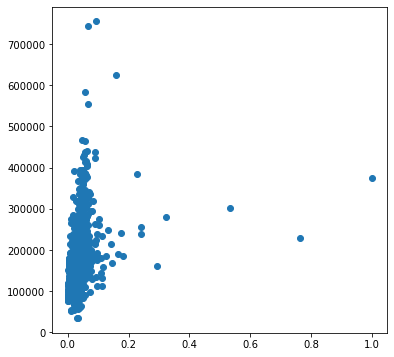

In [124]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.LotArea, df_train.SalePrice)
plt.show()

#### Dividing into X and Y sets for the model building

In [125]:
y_train = df_train.pop('SalePrice')
X_train = df_train

## Building a linear model

In [126]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [127]:
# Check the parameters obtained

lr.params

const                   -3.136108e+06
MSSubClass              -1.317152e+04
LotFrontage              3.358694e+04
LotArea                  1.141265e+05
LotShape                 5.474594e+03
                             ...     
SaleCondition_AdjLand    2.216995e+04
SaleCondition_Alloca     1.822473e+04
SaleCondition_Family     1.229057e+03
SaleCondition_Normal     6.369752e+03
SaleCondition_Partial    1.177590e+04
Length: 229, dtype: float64

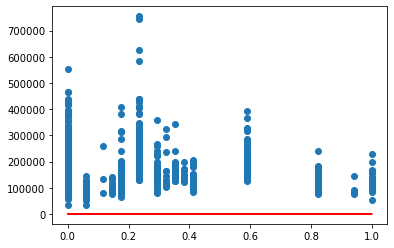

In [128]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [129]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     68.03
Date:                Mon, 21 Jun 2021   Prob (F-statistic):               0.00
Time:                        08:21:20   Log-Likelihood:                -11453.
No. Observations:                1021   AIC:                         2.334e+04
Df Residuals:                     804   BIC:                         2.441e+04
Df Model:                         216                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Residual Analysis of the train data

In [130]:
y_train_price = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

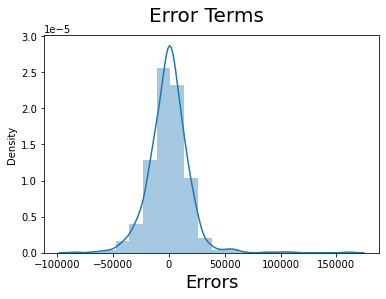

In [131]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [132]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [133]:
# Applying Ridge Regression with varying the hyperparameter 'lambda'

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [134]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.1}


In [136]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 0.1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.55316953e+04  1.61777729e+04  8.78648992e+04  4.49407467e+03
 -2.97142638e+03  6.93049586e+04  4.17839963e+04 -8.35037776e+03
  3.81502916e+04  1.12307855e+04 -9.82482434e+03  1.01660452e+05
  1.52145213e+04  1.54833269e+04  1.03497029e+05  2.99262225e+03
 -9.91447736e+02  1.18762053e+05  1.05586060e+05  1.17311884e+05
  1.26003232e+04  4.32873007e+03 -1.91661732e+03 -2.65351748e+04
 -2.76595993e+04  1.55312611e+04  8.29495798e+03  3.41540715e+04
  1.76728227e+04  2.90991648e+04  3.39050212e+03  5.75531405e+03
  8.05750184e+03 -5.37989146e+03  1.66519556e+04  7.44088262e+03
  8.57702454e+04  1.17528179e+04 -2.21305014e+03 -3.74156837e+04
 -3.36508067e+03 -2.15310876e+03  1.44327341e+03  1.71118630e+04
  2.29172986e+04  2.21108386e+04  1.77462192e+04  1.51122582e+04
  6.18404981e+03 -2.93030390e+03  4.46873867e+03 -2.46090328e+04
  9.66074975e+03 -8.40913979e+03 -4.53271776e+03 -2.85884834e+02
  1.96584603e+04  7.14378181e+03  6.80986172e+03 -2.20719833e+03
  8.97067119e+02  2.35320

In [137]:
#Test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [138]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
#X_test = scaler.transform(df_test[num_vars])

In [139]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Train data Ridge r2', r2_score(y_train, y_pred_train))
print('Train data Ridge MAE:', mean_absolute_error(y_train, y_pred_train))
print('Train data Ridge MSE:', mean_squared_error(y_train, y_pred_train))
print('Train data RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

print('\n')

print('Test data Ridge r2', r2_score(y_test, y_pred_test))
print('Test data Ridge:', mean_absolute_error(y_test, y_pred_test))
print('Test data Ridge:', mean_squared_error(y_test, y_pred_test))
print('Test data Ridge RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

Train data Ridge r2 0.9422026237335147
Train data Ridge MAE: 13137.061058286723
Train data Ridge MSE: 361202398.9779504
Train data RMSE: 19005.32554254071


Test data Ridge r2 0.6726621844555832
Test data Ridge: 20787.240622413494
Test data Ridge: 2106555256.4670074
Test data Ridge RMSE: 45897.224932091565


In [66]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   13.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [69]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=50)

In [70]:
lasso.coef_

array([-3.41605611e-03, -1.60089486e+04,  9.59221536e+03,  5.70629831e+04,
        1.23006653e+02, -0.00000000e+00,  7.50514283e+04,  3.78973977e+04,
       -7.41395166e+03,  3.20887700e+04,  1.31451936e+04, -1.61550805e+03,
        5.49730137e+04,  0.00000000e+00, -0.00000000e+00,  1.08953276e+05,
        1.00487454e+03, -0.00000000e+00,  5.72512748e+04,  5.44373721e+04,
        2.06092680e+05,  1.36200366e+04,  4.78384771e+03,  2.76521934e+02,
       -1.50520526e+04, -2.32922316e+04,  1.76756308e+04,  0.00000000e+00,
        2.88104748e+04,  1.37259632e+04,  2.10227557e+04,  1.10167680e+04,
        3.38630298e+03,  2.87616735e+03, -0.00000000e+00,  4.52737235e+03,
        1.52760146e+03,  3.34118150e+04,  0.00000000e+00, -1.94998166e+03,
       -3.00808628e+04, -5.84063560e+03, -6.54712592e+02,  7.50875638e+02,
        0.00000000e+00,  2.89742856e+03,  6.53973380e+03, -0.00000000e+00,
        0.00000000e+00,  3.61344785e+03,  0.00000000e+00,  2.74296916e+03,
       -0.00000000e+00,  

In [71]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Train data Lasso r2', r2_score(y_train, y_pred_train))
print('Train data Lasso MAE:', mean_absolute_error(y_train, y_pred_train))
print('Train data Lasso MSE:', mean_squared_error(y_train, y_pred_train))
print('Train data Lasso RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

print('\n')

print('Test data Lasso r2', r2_score(y_test, y_pred_test))
print('Test data Lasso:', mean_absolute_error(y_test, y_pred_test))
print('Test data Lasso:', mean_squared_error(y_test, y_pred_test))
print('Test data Lasso RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))


Train data Lasso r2 0.9338341773125647
Train data Lasso MAE: 13837.633992125728
Train data Lasso MSE: 413500671.29101956
Train data Lasso RMSE: 20334.715913703334


Test data Lasso r2 0.6367683825311293
Test data Lasso: 20180.627985925243
Test data Lasso: 2337546830.088858
Test data Lasso RMSE: 48348.18331735804
